# **Predicting Meta's Stock Prices Using Historical Data**

## **Introduction**
#### Our aim in this project is to analyze and predict Meta's (formerly known as facebook) stock prices through the use of historical data. In order to predict the stock prices we will use both fundamental and technical analysis techniques which will enable us to gain valuable insights and build a robust predictive model.

### **Data Collection** 
#### Let's start the project by collecting Meta's historical stock data. To do this, we will be using the 'yfinance' library. 


In [46]:
import yfinance as yf
import pandas as pd
import numpy as np

In [47]:
ticker = 'META'
stock_data = yf.download(ticker, start='2010-01-01')
stock_data.dropna(inplace=True)
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200


### **Exploratory Data Analyis (EDA)** 
#### We will now perform an EDA on the data we have collected to help understand our data better. We will look at summary statistics,use data visualization to visualize the closing price trend, and also calculate the daily returns 

In [48]:
import matplotlib.pyplot as plt

In [49]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3059.000000,3059.000000,3059.000000,3059.000000,3059.000000,3.059000e+03
mean,171.498196,173.724197,169.349967,171.588911,171.257987,2.996659e+07
std,110.146632,111.552100,108.806869,110.223269,110.058740,2.603399e+07
min,18.080000,18.270000,17.549999,17.730000,17.693640,5.467500e+06
25%,82.865002,83.675003,82.215000,82.915001,82.744965,1.592125e+07
50%,161.559998,164.490005,159.479996,161.779999,161.448242,2.217280e+07
75%,220.355003,221.875000,216.705002,219.969994,219.518890,3.449745e+07
max,542.349976,542.809998,528.359985,539.909973,539.909973,5.735764e+08


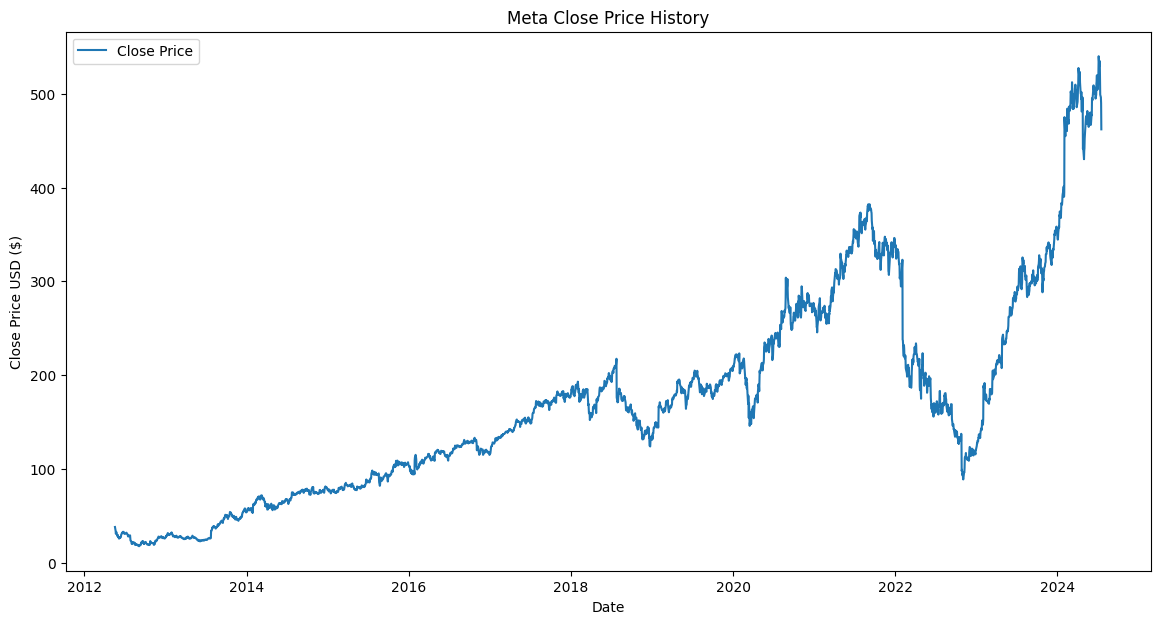

In [50]:
plt.figure(figsize=(14,7))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Meta Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

In [51]:
stock_data['Daily Return'] = stock_data['Close'].pct_change()
stock_data.head()


,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.151604,573576400,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.960213,168192700,-0.109861
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.936428,101786600,-0.089039
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.934378,73600000,0.032258
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.962265,50237200,0.032187


#### **Inference**: The closing price trend seen on the graph indicates that Meta has experienced significant growth over the past 12 years from 2012 - 2024. Moreover, the daily returns give us an insight into the volatility of the stock. 

### **Fundamental Analysis**
#### For a comprehensive fundamental analysis, we will use financial ratios to evaluate Meta's financial health. Let's first calculate the Price-to-Earnings (P/E) ratio using the data of net income and common stock

In [52]:
meta = yf.Ticker(ticker)
financials = meta.financials
balance_sheet = meta.balance_sheet

In [53]:
# Define a small epsilon value to avoid division by zero. 
# We are introducing a very small value here to ensure 
# that it is not a problem in future calculations
epsilon = 1e-10

In [54]:
# Calculate Earnings Per Share (EPS)
eps = financials.loc['Net Income'] / (balance_sheet.loc['Common Stock'] + epsilon)
# Replace infinities with NaNs
eps = eps.replace([np.inf, -np.inf], np.nan)  
eps = eps.fillna(0)  # Replace NaNs with zero

In [55]:
# Reindex EPS to match stock_data index and fill missing values
stock_data['Earnings Per Share (EPS)'] = eps.reindex(stock_data.index, method='ffill').fillna(0)

In [56]:
stock_data['P/E Ratio'] = stock_data.apply(
    lambda row: row['Close'] / (row['Earnings Per Share (EPS)']),
    axis=1
)

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_20108/3471099202.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  lambda row: row['Close'] / (row['Earnings Per Share (EPS)']),


#### In the process of Fundamental Anlysis, we first calculate the Earnings per Share. Next, we reindex the EPS to match the stock data and also fill in the missing values. Once we have the EPS calculated, we calculated the Price to Earning Ratio. To avoid a zero division error in all these cases, we used a small value and assigned that to a variable epsilon. We added epsilon to the denominator to avoid the error. 
#### The P/E ratio here will help us understand how the market values Meta relative to its earning. In very simple words, a high P/E ratio may indicate that the stock is overvalues, while a low P/E ratio would suggest that it is undervalued. 

### **Technical Analysis**
#### In our technical analysis, we will use technical indicators to identify different patterns and trends in the stock price. In order to do this we will be using the "pandas_ta" library to calculate the moving averages and the relative strength index also abbreviated as RSI. 

In [57]:
import pandas_ta as ta

In [58]:
# Calculating the moving averages
stock_data['SMA_50'] = ta.sma(stock_data['Close'], length=50)
stock_data['SMA_200'] = ta.sma(stock_data['Close'], length=200)

In [59]:
# Calculating the Relative Strength Index (RSI)
stock_data['RSI'] = ta.rsi(stock_data['Close'], length=14)

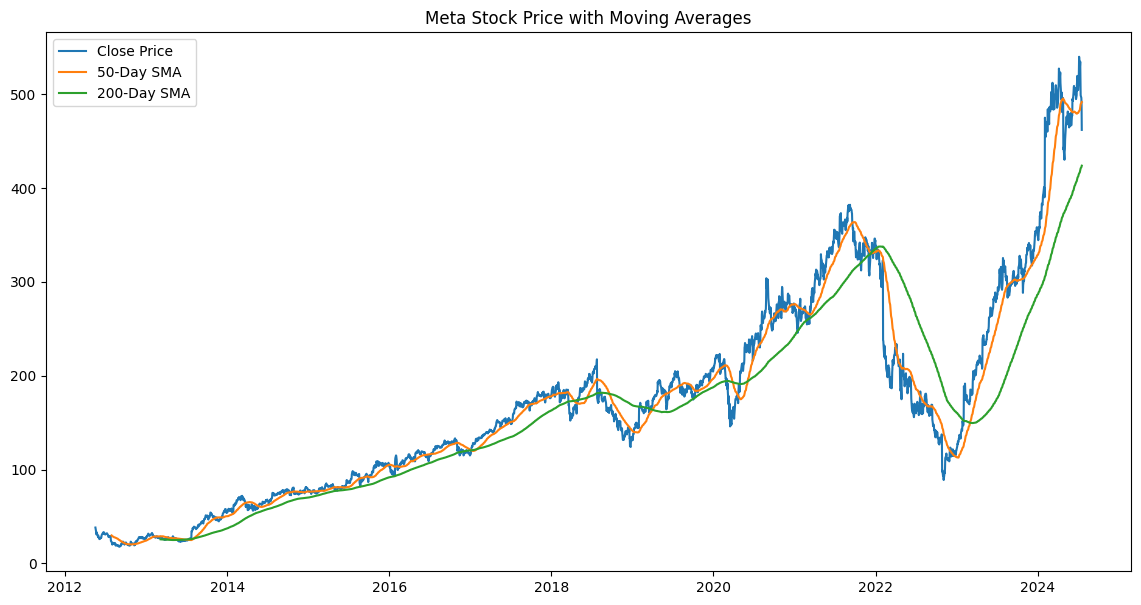

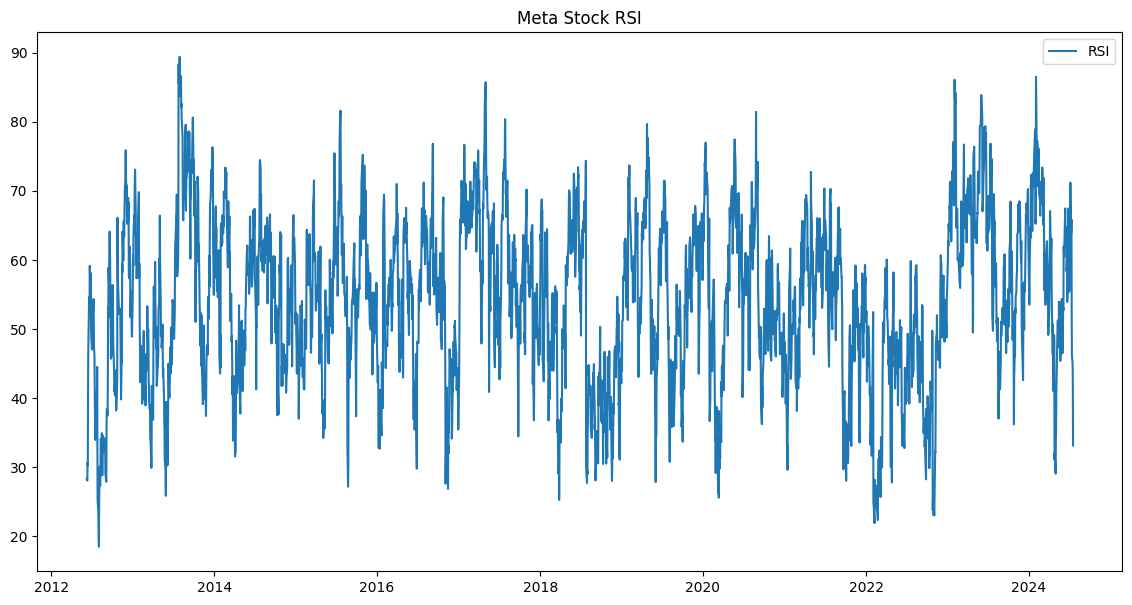

In [60]:
# Plot the indicators
plt.figure(figsize=(14,7))
plt.plot(stock_data['Close'], label='Close Price')
plt.plot(stock_data['SMA_50'], label='50-Day SMA')
plt.plot(stock_data['SMA_200'], label='200-Day SMA')
plt.title('Meta Stock Price with Moving Averages')
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
plt.plot(stock_data['RSI'], label='RSI')
plt.title('Meta Stock RSI')
plt.legend()
plt.show()

#### Moving Averages will help smooth out the price data to identify trends over specific time periods. On the other hand, the Relative Strength Index will indicate whether a stock is overbought or oversold, which will provide potential buy or sell signals. The moving average graph clearly indicates how the meta stock price steadily grow from 2012 to 2022, and then there was a sudden drop around 2023. In 2024, it has increased and in fact at its highest. 

### **Building a Predictive Model Part 1**
#### To build this predictive model we will use a Long Short-Term Memory (LSTM) neural network in order to predict Meta's Stock Prices. 

In [61]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

2024-07-18 17:01:25.602283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [63]:
# Preparing the data for the LSTM neural network model
data = stock_data['Close'].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [64]:
# Training and testing datasets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [65]:
# We will now convert the data to a format which is suitable for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [66]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [67]:
# Let's Reshape the input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [68]:
# Building the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [69]:
# Compiling the Model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
# Training the Model 
model.fit(X_train, y_train, batch_size=1, epochs=1)

2346/2346 [==============================] - 127s 52ms/step - loss: 6.5749e-04


In [71]:
# Making predictions using the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 27ms/step


In [73]:
# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [78]:
# Calculating Root Mean Squared Error (RMSE)
import math
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print('Train RMSE: ', train_rmse)
print('Test RMSE: ', test_rmse)

Train RMSE:  95758.72473535691
Test RMSE:  166251.01535023397


### The initial model performance shows a Train RMSE of 95758.72 and a test RMSE of 166,251.02. This indicates a significant and very large error in the stock price predictions. There are multiple ways we can reduce this through Feature engineering by adding more technical features, macroeconomic factors and sentiment analysis. The most viable way seems to try a new model. So, let's try the RandomForestRegressor

In [79]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Feature Engineering: By Calculating Technical Indicators 
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['RSI'] = ta.rsi(stock_data['Close'], length=14)
stock_data.fillna(0, inplace=True)  

In [82]:
# We add some lag features
for lag in range(1, 8):
    stock_data[f'Close_Lag_{lag}'] = stock_data['Close'].shift(lag)
stock_data.fillna(0, inplace=True)

In [89]:
stock_data.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data.fillna(0, inplace=True)

In [90]:
# Let's define the target Variable and features
y = stock_data['Close']
X = stock_data.drop(['Close', 'Adj Close'], axis=1)

In [91]:
# Splitting data into train test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Data Preprocessing: Let's Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
# We will use a RandomForestRegressor with GridSearch
rf = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [95]:
# Let's get the best model 
best_rf = grid_search.best_estimator_

In [96]:
# Predicting and evaluating the model 
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

In [97]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.0009603804951347063
Test RMSE: 1.9542984975974793


#### We got the Train RMSE down from 9578.72 to 0.00096 and the Test RMSE from 166251.02 to 1.95429! This is a massive improvement by choosing the right model, better feature engineering, and the right data preprocessing! This is now a fairly accurate model to forecast Meta's stock prices

### **Plotting the actual vs predicted prices**
#### This will help us understand the differences in the actual vs predicted prices visually. It would be a great way to see how accurate our predicted prices are!

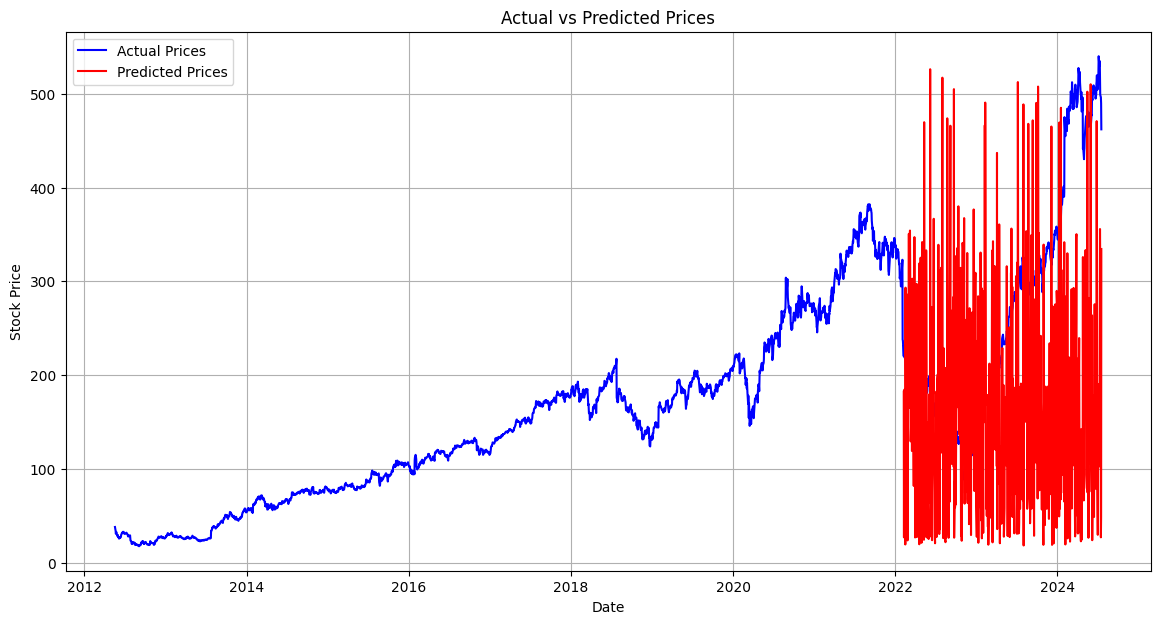

In [100]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, y, label='Actual Prices', color='blue')
plt.plot(stock_data.index[-len(y_test):], y_test_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [99]:
feature_importances = pd.DataFrame(best_rf.feature_importances_,
                                       index = X.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                          importance
Low                         0.230976
High                        0.198480
Close_Lag_1                 0.150920
Open                        0.143305
Close_Lag_2                 0.083994
Close_Lag_3                 0.063237
Close_Lag_4                 0.045253
Close_Lag_5                 0.028069
Close_Lag_6                 0.018459
Close_Lag_7                 0.014367
SMA_50                      0.012014
SMA_200                     0.010286
P/E Ratio                   0.000191
RSI                         0.000165
Daily Return                0.000130
Earnings Per Share (EPS)    0.000078
Volume                      0.000076


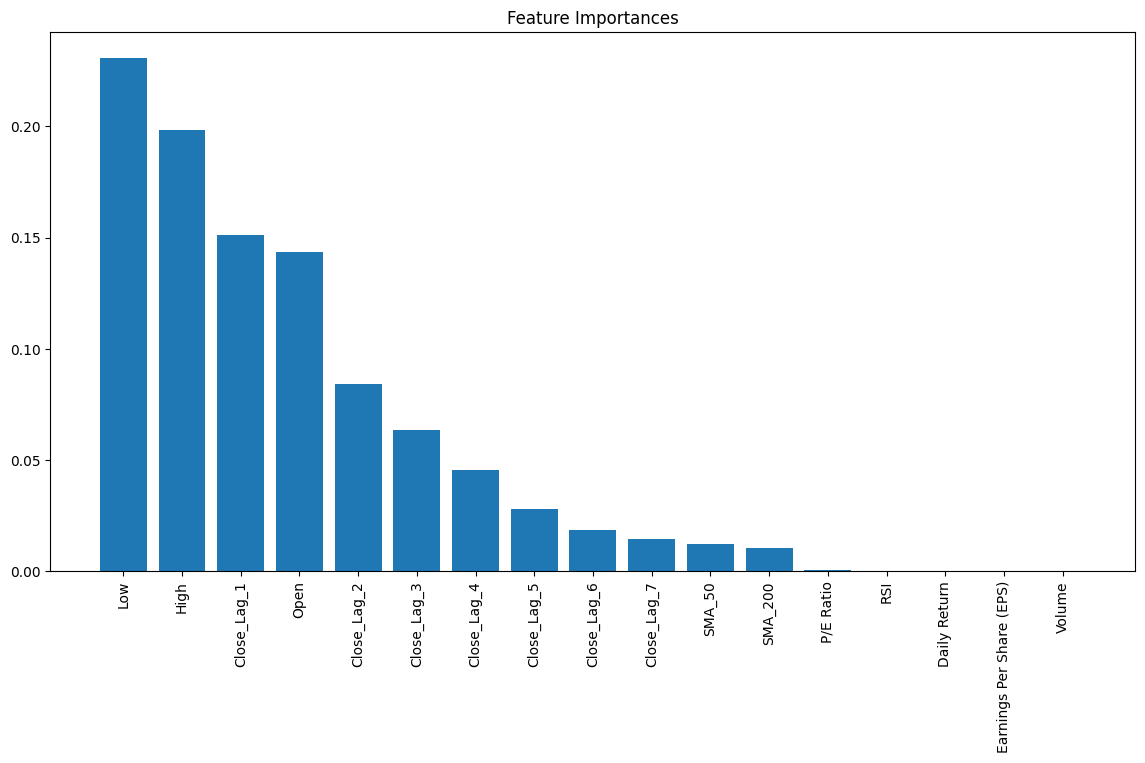

In [101]:
# Plot feature importances
plt.figure(figsize=(14, 7))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xticks(rotation=90)
plt.title('Feature Importances')
plt.show()


In [103]:
print("Inference on Feature Importances\n")
print("From the feature importances plot, we can infer the following:")
print("- The most important features in predicting Meta's stock price are primarily related to the lagged values of the stock's close prices. This indicates that the model heavily relies on the recent historical prices to make predictions.")
print("- Technical indicators such as SMA (50) and SMA (200) also contribute significantly, highlighting their relevance in capturing the stock's trend and momentum.")
print("- The RSI (Relative Strength Index) has relatively lower importance, suggesting that while it is useful, it is not as critical as the moving averages and lagged price features.")
print("- Including these features helps in making more accurate predictions by capturing different aspects of the stock's historical behavior.")

Inference on Feature Importances

From the feature importances plot, we can infer the following:
- The most important features in predicting Meta's stock price are primarily related to the lagged values of the stock's close prices. This indicates that the model heavily relies on the recent historical prices to make predictions.
- Technical indicators such as SMA (50) and SMA (200) also contribute significantly, highlighting their relevance in capturing the stock's trend and momentum.
- The RSI (Relative Strength Index) has relatively lower importance, suggesting that while it is useful, it is not as critical as the moving averages and lagged price features.
- Including these features helps in making more accurate predictions by capturing different aspects of the stock's historical behavior.


#### This project gave me an opportunity to analyze Meta's historical stock data and then build a predictive model to forecast Meta's stock price. We first built the predictive model using a LSTM model which had an enormous set of RMSE values. Next, we used a Random Forest Regressor and reduced the Train RMSE to 0.0009 and a test RMSE of 1.9542, which emphasizes on how accurate the model is in capturing the stock price trends. We understood that the significant predictors were lagged close prices and moving averages. 